In [1]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")

In [2]:
from scipy import signal
import numpy as np
import pandas as pd
from src.plot_raw import plot_raw
from matplotlib import pyplot as plt

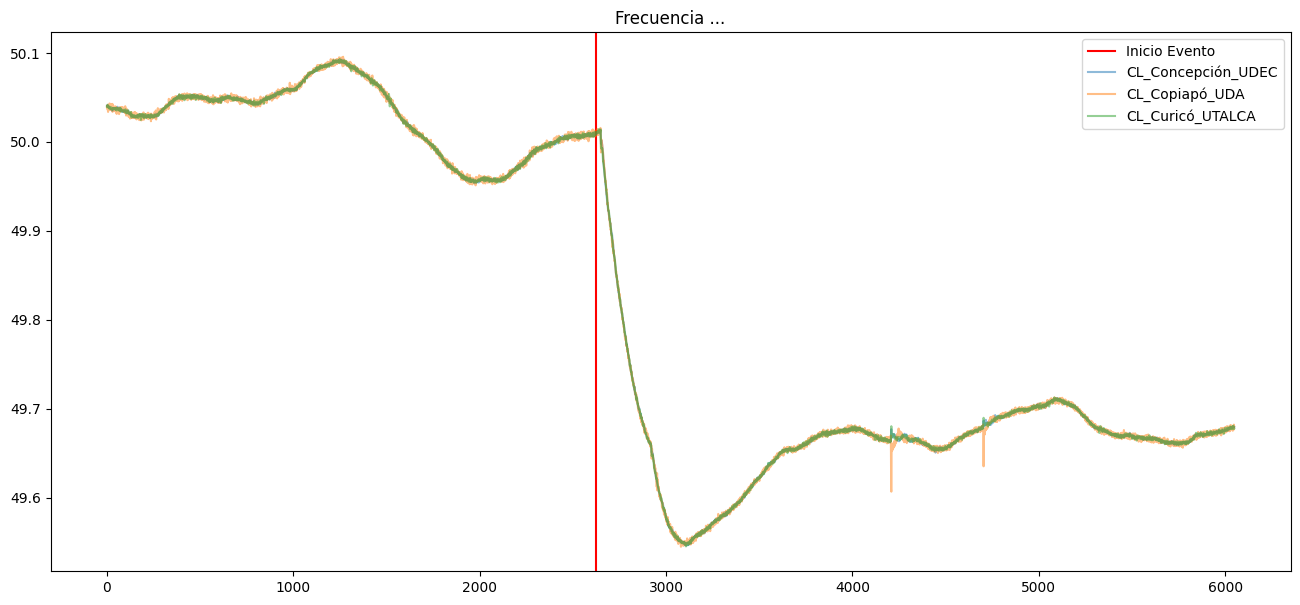

In [3]:
## Ejemplo uso plot_raw

input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

In [121]:
## EJemplo uso scipy.optimize.differential_evolution
from src.sampler import sampler
from scipy.optimize import differential_evolution
from src.objective_function import objective_function

input_path = "./data/raw/2021 set n1/2021_05_02-16_44_00.csv"

model = 1
Ts = 0.3
df = sampler(input_path, Ts, event_time=25)
P0 = df["power"][0] / 1000

#END_TIME = 65 ## FIX THIS!!

#event_freq = df["freq"][df["event"]==1][df["time"]<END_TIME].to_numpy()
#event_freq = event_freq[2:-1]

event_freq = df["freq"][df["event"]==1].to_numpy()

bounds = [(0.00001, 1000) for i in range(6)]
arguments = (model, Ts, P0, event_freq)
result = differential_evolution(objective_function, bounds, args=(arguments,))


Optimization terminated successfully.
[2.20404851e+00 1.00000000e-05 8.21097670e+02 2.34574652e+00
 7.61377448e+02 1.00000000e-05]
0.03956621769216489


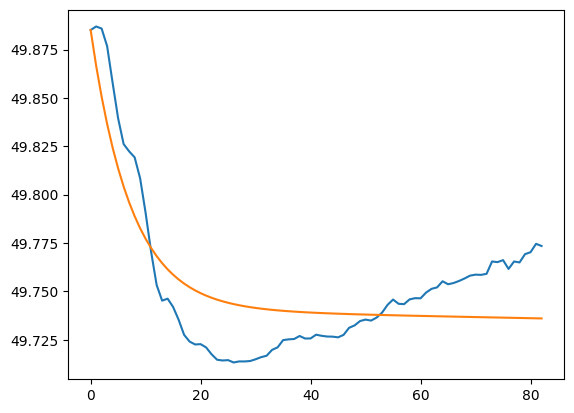

In [122]:
print(result.message)
print(result.x)
print(result.fun)
from src.objective_function import modelo_1


sys = modelo_1(result.x, Ts)

sim_power = P0 * np.repeat(1, event_freq.shape)
sim = signal.dlsim(sys, sim_power, x0 = event_freq[0])
sim_freq = sim[1].ravel()
        
ssd = np.sum((sim_freq - event_freq)**2)

plt.plot(event_freq)
plt.plot(sim_freq)

ValueError: x and y must have same first dimension, but have shapes (135,) and (136,)

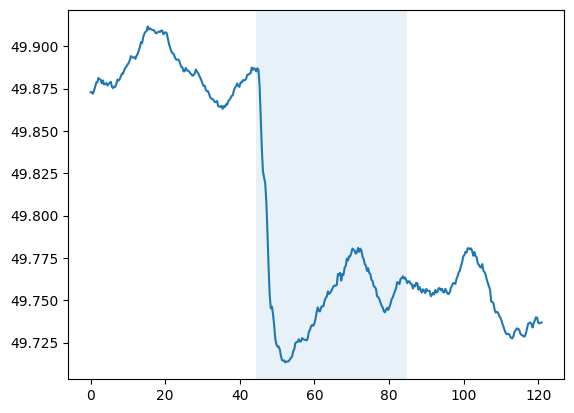

In [23]:
from src.objective_function import modelo_1

real_time = df["time"].to_numpy()
real_freq = df["freq"].to_numpy()


event_time = df["time"][df["event"]==1][df["time"]<END_TIME].to_numpy()

plt.plot(real_time,real_freq)
plt.axvspan(event_time.min(),event_time.max(), alpha=.1)

sim_time = np.arange(event_time[0],event_time[-1],Ts)
sim_power = P0 * np.repeat(1,event_freq.shape)

sys_k = modelo_1(result.x, Ts)
sim = signal.dlsim(sys_k, sim_power, x0 = event_freq[0])

plt.plot(sim_time,sim[1].ravel())

In [14]:
result.x

array([1.08888844e-03, 6.94611770e-02, 1.53137630e+00, 1.58804172e+01,
       4.99937462e+01, 1.00000000e-05])

In [10]:
# Ejemplo uso objective_function
from src.objective_function import objective_function

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model =1
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000

args = (model, Ts, P0, event_freq)

objective_function(params, args)

428159.742116734


428159.742116734

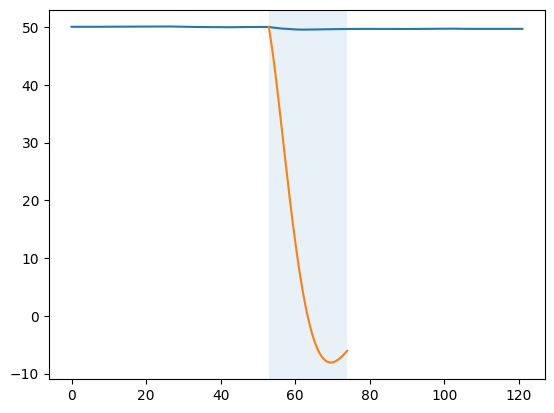

In [9]:
## Esto es para el "result ploter"

from src.objective_function import modelo_1

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

Ts = 0.3

sys_k = modelo_1(params,Ts)

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
real_time = df["Tiempo [s]"].to_numpy()
real_freq = df["Frecuencia [Hz]"].to_numpy()
real_power = df["Potencia [MW]"].to_numpy()

event_time = df["Tiempo [s]"][df["Evento"]==1].to_numpy()
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()
event_power = df["Potencia [MW]"][df["Evento"]==1].to_numpy()

plt.plot(real_time,real_freq)
plt.axvspan(event_time.min(),event_time.max(), alpha=.1)

sim_time = np.arange(event_time[0],event_time[-1],Ts)
P0 = event_power[0] / 1000
sim_power = P0 * np.repeat(1,sim_time.shape)


sim = signal.dlsim(sys_k, sim_power, x0 = event_freq[0])

plt.plot(sim_time,sim[1])